### Data Generation & Exploratory Analysis

**Overview:**  
Establish a reproducible foundation for tail-risk and extreme value modeling by generating synthetic asset return data with distinct distributional characteristics.
This notebook simulates and explores daily return distributions for three hypothetical assets, each designed to represent a different type of tail behavior encountered in financial markets. 
The analysis forms the empirical basis for subsequent risk estimation methods. 

---

**Key Components:**
- **Data Simulation:**  
  Generates three asset return series:
  - *Asset A:* Light-tailed (Normal)
  - *Asset B:* Moderately volatile (Normal)
  - *Asset C:* Heavy-tailed (Student-t)


---

- **Exploratory Visualization:**  
  - Histograms to compare distributional shapes  
  - QQ-plots to inspect tail deviations from normality  


---

- **Descriptive Statistics:**  
  Computes and reports mean, standard deviation, skewness, and excess kurtosis for each asset, quantifying how return asymmetry and tail heaviness differ across distributions. Estimates empirical 1%, 5%, and 10% quantiles (VaR Benchmarks), providing a look at downside tail risk before applying parametric VaR models.

---

- **Data Export:**  
  The simulated dataset is saved as `data/simulated_returns.csv` ensuring a reproducible workflow and consistent comparison across all tail-risk methods.


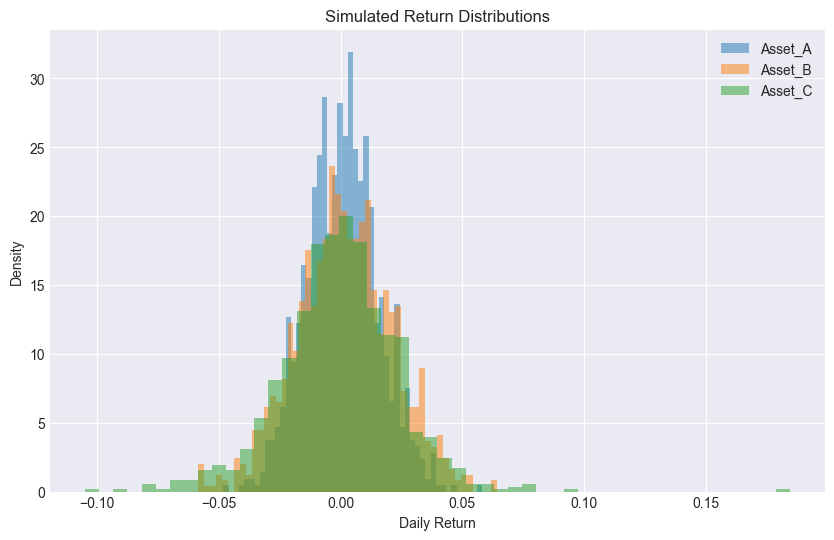

Asset_A: {'mean': np.float64(0.0007899808373348827), 'std': np.float64(0.014688239072695133), 'skew': np.float64(0.11680083110533501), 'kurtosis_excess': np.float64(0.06620589292148393)}
Asset_B: {'mean': np.float64(0.0016167247449831183), 'std': np.float64(0.019949087544548418), 'skew': np.float64(-0.04932177396529908), 'kurtosis_excess': np.float64(0.052117545697841106)}
Asset_C: {'mean': np.float64(-0.0003372892784760297), 'std': np.float64(0.02430180489713207), 'skew': np.float64(0.23433859995256476), 'kurtosis_excess': np.float64(4.222721651582809)}


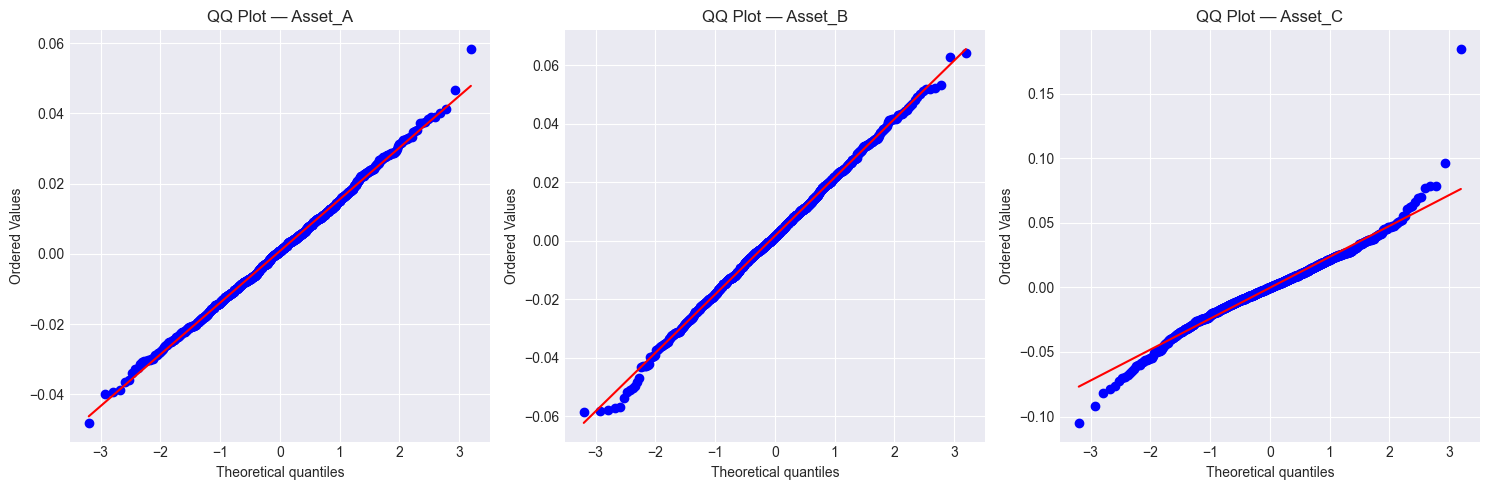


Empirical Quantiles (VaR levels):


,Asset_A,Asset_B,Asset_C
1%,-0.030735,-0.048300,-0.064601
5%,-0.022389,-0.031333,-0.039479
10%,-0.018171,-0.023673,-0.028860



✅ Synthetic return data saved to 'data/simulated_returns.csv'.


In [10]:
# Extreme Risk Estimation
# Introduce dataset generation, preprocessing, and exploratory stats for extreme value and tail-risk estimation models.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

plt.style.use("seaborn-v0_8-darkgrid")


# Generate Synthetic Returns Data
np.random.seed(42)

# Simulate daily returns for 3 hypothetical assets
returns = {
    "Asset_A": np.random.normal(0.0005, 0.015, 1000),   # light tail
    "Asset_B": np.random.normal(0.0002, 0.02, 1000),    # medium tail
    "Asset_C": stats.t.rvs(df=4, loc=0.0003, scale=0.018, size=1000)  # heavy tail
}

returns_df = pd.DataFrame(returns)

# Plot the Return Distributions
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for col in returns_df.columns:
    sns = ax.hist(returns_df[col], bins=50, alpha=0.5, density=True, label=col)
ax.legend()
ax.set_title("Simulated Return Distributions")
ax.set_xlabel("Daily Return")
ax.set_ylabel("Density")
plt.show()

# Exploratory Statistics
def summary_stats(series):
    """Return key statistical measures for a given return series."""
    return {
        'mean': np.mean(series),
        'std': np.std(series, ddof=1),
        'skew': stats.skew(series),
        'kurtosis_excess': stats.kurtosis(series, fisher=True)
    }

for col in returns_df.columns:
    print(f"{col}:", summary_stats(returns_df[col]))

# Check Tail Behavior - Compare normal QQ plots to detect heavy tails
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(returns_df.columns):
    stats.probplot(returns_df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"QQ Plot — {col}")
plt.tight_layout()
plt.show()

# Compute Empirical Quantiles
alphas = [0.01, 0.05, 0.1]
quantiles = returns_df.quantile(alphas)
quantiles.index = [f"{int(a*100)}%" for a in alphas]
print("\nEmpirical Quantiles (VaR levels):")
display(quantiles)

# Save Dataset for Reuse
os.makedirs("data", exist_ok=True)
returns_df.to_csv("data/simulated_returns.csv", index=False)
print("\n✅ Synthetic return data saved to 'data/simulated_returns.csv'.")
